In [1]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

In [2]:
total_data = pd.read_csv("/users/siyaogu/Desktop/ORIE4741/Final_Project/linear_model/linear_model.csv")

In [3]:
total_data["F"] = total_data["F"].astype('category')
total_data["M"] = total_data["M"].astype('category')
total_data["Black/African American"] = total_data["Black/African American"].astype('category')
total_data["Other Race"] = total_data["Other Race"].astype('category')
total_data["White"] = total_data["White"].astype('category')
total_data["0"] = total_data["0"].astype('category')
total_data["139"] = total_data["139"].astype('category')
total_data["140"] = total_data["140"].astype('category')
total_data["194"] = total_data["194"].astype('category')
total_data["540"] = total_data["540"].astype('category')
total_data["560"] = total_data["560"].astype('category')
total_data["640"] = total_data["640"].astype('category')
total_data["720"] = total_data["720"].astype('category')
total_data["Extreme"] = total_data["Extreme"].astype('category')
total_data["Major"] = total_data["Major"].astype('category')
total_data["Minor"] = total_data["Minor"].astype('category')
total_data["Moderate"] = total_data["Moderate"].astype('category')
total_data["N_emer"] = total_data["N_emer"].astype('category')
total_data["Y_emer"] = total_data["Y_emer"].astype('category')
total_data["0_age"] = total_data["0_age"].astype('category')
total_data["1_age"] = total_data["1_age"].astype('category')
total_data["2_age"] = total_data["2_age"].astype('category')
total_data["3_age"] = total_data["3_age"].astype('category')
total_data["4_age"] = total_data["4_age"].astype('category')
total_data["0_admin"] = total_data["0_admin"].astype('category')
total_data["1_admin"] = total_data["1_admin"].astype('category')
total_data["2_admin"] = total_data["2_admin"].astype('category')
total_data["3_admin"] = total_data["3_admin"].astype('category')
total_data["4_admin"] = total_data["4_admin"].astype('category')
total_data["5_admin"] = total_data["5_admin"].astype('category')
total_data["0_dispo"] = total_data["0_dispo"].astype('category')
total_data["10_dispo"] = total_data["10_dispo"].astype('category')
total_data["11_dispo"] = total_data["11_dispo"].astype('category')
total_data["12_dispo"] = total_data["12_dispo"].astype('category')
total_data["13_dispo"] = total_data["13_dispo"].astype('category')
total_data["14_dispo"] = total_data["14_dispo"].astype('category')
total_data["15_dispo"] = total_data["15_dispo"].astype('category')
total_data["16_dispo"] = total_data["16_dispo"].astype('category')
total_data["17_dispo"] = total_data["17_dispo"].astype('category')
total_data["18_dispo"] = total_data["18_dispo"].astype('category')
total_data["1_dispo"] = total_data["1_dispo"].astype('category')
total_data["2_dispo"] = total_data["2_dispo"].astype('category')
total_data["3_dispo"] = total_data["3_dispo"].astype('category')
total_data["4_dispo"] = total_data["4_dispo"].astype('category')
total_data["5_dispo"] = total_data["5_dispo"].astype('category')
total_data["6_dispo"] = total_data["6_dispo"].astype('category')
total_data["7_dispo"] = total_data["7_dispo"].astype('category')
total_data["8_dispo"] = total_data["8_dispo"].astype('category')
total_data["9_dispo"] = total_data["9_dispo"].astype('category')
total_data["Manhattan"] = total_data["Manhattan"].astype('category')
total_data["Kings"] = total_data["Kings"].astype('category')
total_data["Queens"] = total_data["Queens"].astype('category')
total_data["Nassau"] = total_data["Nassau"].astype('category')
total_data["Bronx"] = total_data["Bronx"].astype('category')
total_data["Suffolk"] = total_data["Suffolk"].astype('category')
total_data["Erie"] = total_data["Erie"].astype('category')
total_data["Westchester"] = total_data["Westchester"].astype('category')
total_data["Monroe"] = total_data["Monroe"].astype('category')
total_data["Onondaga"] = total_data["Onondaga"].astype('category')
total_data["Albany"] = total_data["Albany"].astype('category')
total_data["Richmond"] = total_data["Richmond"].astype('category')

In [4]:
# Train -> 80%, Test -> 20%
X_train, X_test, Y_train, Y_test = train_test_split(total_data, total_data['Total Charges'], test_size=0.2)

In [5]:
X_hos = X_train[['Length of Stay','F',
       #'M', 
       'Black/African American', 'Other Race',
       #'White', 
       #0, 
       "139", "140", "194", "540", "560", "640", "720", 
       #'Extreme', 
       'Major', 'Minor', 'Moderate',
       #'N_emer', 
       'Y_emer', 
       #'0_age', 
       '1_age', '2_age', '3_age', '4_age', 
       #'0_admin', 
       '1_admin', '2_admin', '3_admin', '4_admin', '5_admin', '0_dispo', 
       '10_dispo', '11_dispo', '12_dispo', '13_dispo', '14_dispo', '15_dispo',
       '16_dispo', '17_dispo', 
       #'18_dispo', 
       '1_dispo', '2_dispo', '3_dispo',
       '4_dispo', '5_dispo', '6_dispo', '7_dispo', '8_dispo', '9_dispo',
       #"Manhattan",
       "Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"]]

In [16]:
# Simple linear regression
pd.options.display.max_rows = 60
lm_hos = LinearRegression()
lm_hos.fit(X_hos, Y_train)
pd.DataFrame(zip(X_hos.columns, lm_hos.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Length of Stay,0.049796
1,F,-0.056857
2,Black/African American,-0.106664
3,Other Race,-0.073596
4,139,-0.174477
5,140,-0.218590
6,194,-0.139974
7,540,-0.176214
8,560,-0.511887
9,640,-0.922234


In [17]:
# R^2
lm_hos.score(X_hos,Y_train)

0.64600747573660311

In [6]:
X_test = X_test[['Length of Stay','F',
       #'M', 
       'Black/African American', 'Other Race',
       #'White', 
       #0, 
       "139", "140", "194", "540", "560", "640", "720", 
       #'Extreme', 
       'Major', 'Minor', 'Moderate',
       #'N_emer', 
       'Y_emer', 
       #'0_age', 
       '1_age', '2_age', '3_age', '4_age', 
       #'0_admin', 
       '1_admin', '2_admin', '3_admin', '4_admin', '5_admin', '0_dispo', 
       '10_dispo', '11_dispo', '12_dispo', '13_dispo', '14_dispo', '15_dispo',
       '16_dispo', '17_dispo', 
       #'18_dispo', 
       '1_dispo', '2_dispo', '3_dispo',
       '4_dispo', '5_dispo', '6_dispo', '7_dispo', '8_dispo', '9_dispo',
       #"Manhattan",
       "Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"]]

In [18]:
# Training MSE
Y_hos_pred_train = lm_hos.predict(X_hos)
mean_squared_error(Y_train.values, Y_hos_pred_train)

0.39811974847751419

In [19]:
# Test MSE
Y_hos_pred = lm_hos.predict(X_test)
mean_squared_error(Y_test.values, Y_hos_pred)

0.39862924018895846

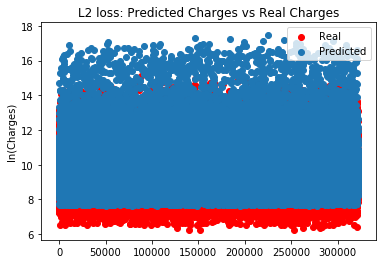

In [20]:
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red',label='Real')
plt.scatter(x,Y_hos_pred, label = 'Predicted')
plt.title('L2 loss: Predicted Charges vs Real Charges')
plt.ylabel('ln(Charges)')
plt.legend(loc=1)

In [21]:
# Huber Regression
huber = HuberRegressor()
huber.fit(X_hos, Y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [22]:
pd.DataFrame(zip(X_hos.columns, huber.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Length of Stay,0.064916
1,F,-0.043286
2,Black/African American,-0.102216
3,Other Race,-0.073854
4,139,-0.151337
5,140,-0.194851
6,194,-0.120118
7,540,-0.212812
8,560,-0.530943
9,640,-0.883168


In [23]:
# Training MSE
Y_huber_pred_train = huber.predict(X_hos)
mean_squared_error(Y_train.values, Y_huber_pred_train)

0.4197866844727059

In [24]:
# Test MSE
Y_huber_pred = huber.predict(X_test)
mean_squared_error(Y_test.values, Y_huber_pred)

0.41973930188658759

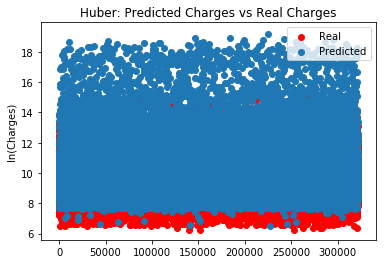

In [25]:
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red',label='Real')
plt.scatter(x,Y_huber_pred, label = 'Predicted')
plt.title('Huber: Predicted Charges vs Real Charges')
plt.ylabel('ln(Charges)')
plt.legend(loc=1)

In [21]:
# Ridge Regression (L2 + quadratic)
ridge = Ridge(alpha=1.0)
ridge.fit(X_hos, Y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
# Training MSE
Y_ridge_pred_train = ridge.predict(X_hos)
mean_squared_error(Y_train.values, Y_ridge_pred_train)

0.39799399671081748

In [23]:
# Test MSE
Y_ridge_pred = ridge.predict(X_test)
mean_squared_error(Y_test.values, Y_ridge_pred)

0.39914363245714196

([], <a list of 0 Text xticklabel objects>)

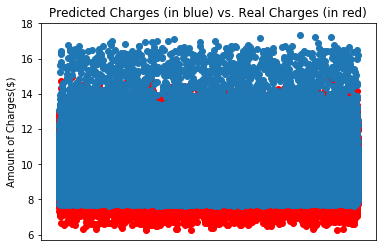

In [24]:
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_ridge_pred)
plt.title('Predicted Charges (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])

In [25]:
# Lasso Regression (L2 + L1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_hos, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
pd.options.display.max_rows = 60
pd.DataFrame(zip(X_hos.columns, lasso.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Length of Stay,0.055497
1,F,-0.038081
2,Black/African American,-0.048831
3,Other Race,-0.000000
4,139,-0.000000
5,140,-0.000000
6,194,-0.000000
7,540,-0.000000
8,560,-0.269568
9,640,-0.801908


In [27]:
# Training MSE
Y_lasso_pred_train = lasso.predict(X_hos)
mean_squared_error(Y_train.values, Y_lasso_pred_train)

0.44550263374934718

In [28]:
# Test MSE
Y_lasso_pred = lasso.predict(X_test)
mean_squared_error(Y_test.values, Y_lasso_pred)

0.44828287887806967

([], <a list of 0 Text xticklabel objects>)

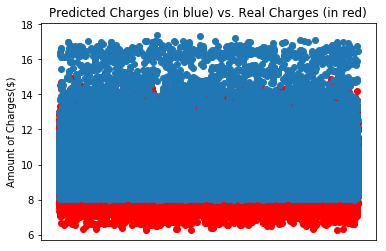

In [29]:
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_lasso_pred)
plt.title('Predicted Charges (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])

In [30]:
# Random Forest with max_depth = 400, n_estimators=10
forest = RandomForestRegressor(max_depth=400, random_state=0)
forest.fit(X_hos, Y_train)
# Converge since max_depth = 100

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [31]:
# Training MSE
Y_forest_pred_train = forest.predict(X_hos)
mean_squared_error(Y_train.values, Y_forest_pred_train)

0.1870844959103459

In [32]:
# Test MSE
Y_forest_pred = forest.predict(X_test)
mean_squared_error(Y_test.values, Y_forest_pred)

0.24863648130946309

([], <a list of 0 Text xticklabel objects>)

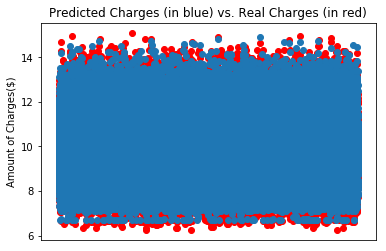

In [33]:
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_forest_pred)
plt.title('Predicted Charges (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])

In [34]:
print(forest.feature_importances_)

[  6.01530346e-01   8.59356292e-03   6.34838179e-03   7.07705667e-03
   1.79048910e-03   1.63498311e-03   1.92444636e-03   1.26603836e-02
   2.12691765e-02   2.45498720e-03   1.99421171e-03   5.25088626e-03
   1.08020050e-02   1.13859877e-02   8.40838394e-03   4.50062479e-03
   4.17565384e-03   6.56988794e-03   6.79568777e-03   5.74436015e-03
   2.05207702e-03   2.19250683e-02   1.26462660e-01   2.18738352e-04
   2.02458849e-06   4.70380627e-04   5.16276385e-04   1.51383582e-03
   2.49042097e-03   2.45417641e-03   4.79330061e-03   3.49415132e-03
   5.95240382e-03   8.60380950e-06   4.38428788e-05   4.49085752e-06
   2.91988466e-04   3.49368884e-04   2.24848190e-04   5.55452259e-04
   3.12928302e-04   8.83909391e-04   9.58986360e-03   6.02679080e-03
   1.02943628e-02   5.50451538e-03   9.43368193e-03   1.38410364e-02
   5.73993396e-03   2.10169050e-02   7.60508643e-03   2.98088540e-03
   2.03448912e-03]


In [8]:
# Random Forest with max_depth = 100, n_estimators=5
forest = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=5)
forest.fit(X_hos, Y_train)
# Converge since max_depth = 100
# Training MSE
Y_forest_pred_train = forest.predict(X_hos)
print(mean_squared_error(Y_train.values, Y_forest_pred_train))

0.190318974683


0.251403700454


([], <a list of 0 Text xticklabel objects>)

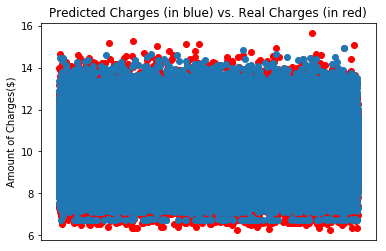

In [15]:
# Test MSE
Y_forest_pred = forest.predict(X_test)
print(mean_squared_error(Y_test.values, Y_forest_pred))
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_forest_pred)
plt.title('Predicted Charges (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])

In [ ]:
# Random Forest with best number of trees from 10 to 19
test_mse = []
for n in range(10):
    forest = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=n+10)
    forest.fit(X_hos, Y_train)
    Y_forest_pred = forest.predict(X_test)
    test_mse.append(mean_squared_error(Y_test.values, Y_forest_pred))

In [36]:
test_mse

[0.25257825679190243,
 0.25132926936598204,
 0.25035713787265373,
 0.24967498073998107,
 0.24915321955690545,
 0.24863648130946309,
 0.24818530726881383,
 0.24784201012303489,
 0.2476050655351123,
 0.2474088043551477]

In [7]:
# Random Forest with best number of trees from 20 to 29
test_mse = []
for n in range(10):
    forest = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=n+20)
    forest.fit(X_hos, Y_train)
    Y_forest_pred = forest.predict(X_test)
    test_mse.append(mean_squared_error(Y_test.values, Y_forest_pred))
test_mse

[0.24765596895595637,
 0.2475516262121201,
 0.24747392455403111,
 0.24737094140142385,
 0.24729902558613734,
 0.24724611211425815,
 0.24721694504644717,
 0.24716769843743916,
 0.24713255599745523,
 0.24708765783900893]

In [7]:
# Random Forest converges, n_estimators=10
test_mse = []
for n in range(15):
    forest = RandomForestRegressor(max_depth=(n+1)*10, random_state=0, n_estimators=10)
    forest.fit(X_hos, Y_train)
    Y_forest_pred = forest.predict(X_test)
    test_mse.append(mean_squared_error(Y_test.values, Y_forest_pred))
test_mse

[0.28994957031626645,
 0.238997214802943,
 0.24587049501070835,
 0.24897332615687068,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856,
 0.24902414156592856]

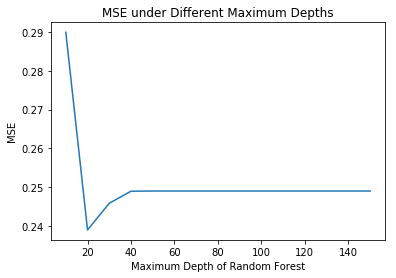

In [13]:
test_mse = [0.28994957031626645, 0.238997214802943, 0.24587049501070835, 0.24897332615687068,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856,\
 0.24902414156592856]
test_mse_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
plt.plot(test_mse_x,test_mse)
plt.title('MSE under Different Maximum Depths')
plt.ylabel('MSE')
plt.xlabel('Maximum Depth of Random Forest')

In [ ]:
# Random Forest with best number of trees from 10 to 100, max_depth = 20
test_mse = []
for n in range(10):
    forest = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=(n+1)*10)
    forest.fit(X_hos, Y_train)
    Y_forest_pred = forest.predict(X_test)
    test_mse.append(mean_squared_error(Y_test.values, Y_forest_pred))
    print(mean_squared_error(Y_test.values, Y_forest_pred))

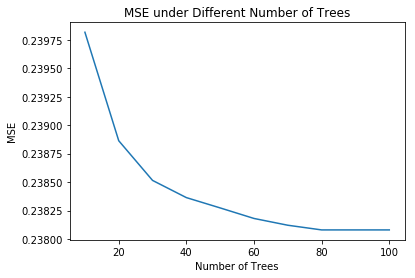

In [40]:
test_mse_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(test_mse_x,test_mse)
plt.title('MSE under Different Number of Trees')
plt.ylabel('MSE')
plt.xlabel('Number of Trees')

In [41]:
test_mse

[0.23981532886904042,
 0.23886333338928564,
 0.23851512045764361,
 0.23836429185679842,
 0.23827375174728321,
 0.23818128064459138,
 0.23812181333509569,
 0.23808079036031382,
 0.23808079036031382,
 0.23808079036031382]

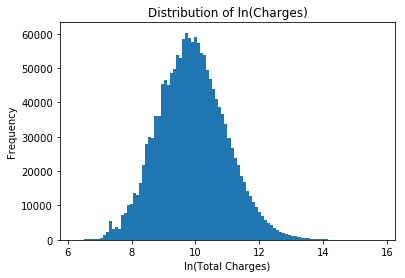

In [31]:
plt.hist(total_data['Total Charges'],bins =100)
plt.title('Distribution of ln(Charges)')
plt.xlabel('ln(Total Charges)')
plt.ylabel('Frequency')

0.212944081213
0.23808079036


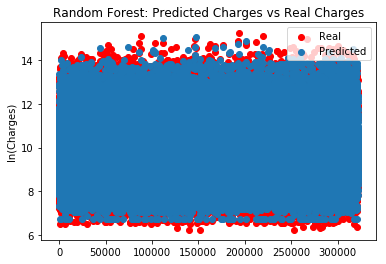

In [42]:
# Random Forest with max_depth = 20, n_estimators=80
forest = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=80)
forest.fit(X_hos, Y_train)
# Converge since max_depth = 100
# Training MSE
Y_forest_pred_train = forest.predict(X_hos)
print(mean_squared_error(Y_train.values, Y_forest_pred_train))
# Test MSE
Y_forest_pred = forest.predict(X_test)
print(mean_squared_error(Y_test.values, Y_forest_pred))
x = list(range(1, len(Y_test)+1, 1))
plt.scatter(x,Y_test.values,color='red',label='Real')
plt.scatter(x,Y_forest_pred, label = 'Predicted')
plt.title('Random Forest: Predicted Charges vs Real Charges')
plt.ylabel('ln(Charges)')
plt.legend(loc=1)

In [47]:
Y_test.values[1]

8.826498292050001

In [48]:
count = 0
for i in range(321530):
    if (Y_test.values[i] > Y_forest_pred[i]):
        count = count + 1
print(count)
print(count/len(Y_test))

155409
0


In [50]:
155409.0/len(Y_test)

0.48334214536746184

In [51]:
count = 0
for i in range(321530):
    if (Y_test.values[i] < Y_forest_pred[i]):
        count = count + 1
print(count)
print(count/len(Y_test))

166121
0


In [52]:
166121.0/len(Y_test)

0.5166578546325382